# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from my_functions import initial_analysis
from my_functions import create_plot

from wordcloud import WordCloud
import re

from utils import plot_ngrams, plot_ngrams_no_stopwords

# Introduction 

In the digital age, online platforms that facilitate open communication face the significant challenge of managing user-generated content. Among the most pressing issues is the presence of toxic comments—remarks. ["Hatred is expressed and promoted much more easily online and
can contribute to increasing offline violence"](https://fra.europa.eu/sites/default/files/fra_uploads/fra-2023-online-content-moderation_en.pdf). If left unchecked, such content can lead to a deterioration in the user experience, a decline in platform reputation, and ultimately, a loss of users and revenue. Given the sheer volume of content generated daily, manually moderating comments is not only impractical but also prohibitively expensive. This is where machine learning comes into play.

**The objective of this project is to develop a multi-label classifier capable of automatically detecting and flagging toxic comments on online forums.** This classifier will be trained to recognize various forms of toxicity, allowing it to categorize comments into one or more relevant categories. By automating the process of content moderation, the classifier can significantly reduce the burden on human moderators, ensuring that harmful content is identified and addressed swiftly, thereby maintaining the integrity and safety of the online environment.

To achieve this, we will utilize the [Kaggle Toxic Comment Classification Challenge](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data) dataset, which provides a rich collection of comments labeled across six categories of toxicity: toxic, severe toxic, obscene, threat, insult, and identity hate. The dataset contains over 150,000 comments, with each comment potentially belonging to multiple categories, making it an ideal resource for training a multi-label classifier. This project will involve data preprocessing, model development, training, and evaluation to create an effective solution for automated toxic comment detection.

# Exploratory Data Analysis 

## Initial Analysis

In [2]:
test_df = pd.read_csv('test.csv')
test_labels_df = pd.read_csv('test_labels.csv')
train_df = pd.read_csv('train.csv')

#### test_df

In [3]:
initial_analysis(test_df)

(153164, 2)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


Index(['id', 'comment_text'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


None

Unique Values in Each Column:
id: 153164 unique values
comment_text: 153164 unique values

Duplicated Values in DataFrame:
Total duplicated rows: 0


,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


#### test_labels_df

In [4]:
initial_analysis(test_labels_df)

(153164, 7)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1
153163,ffffce3fb183ee80,-1,-1,-1,-1,-1,-1


Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             153164 non-null  object
 1   toxic          153164 non-null  int64 
 2   severe_toxic   153164 non-null  int64 
 3   obscene        153164 non-null  int64 
 4   threat         153164 non-null  int64 
 5   insult         153164 non-null  int64 
 6   identity_hate  153164 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.2+ MB


None

Unique Values in Each Column:
id: 153164 unique values
toxic: 3 unique values
severe_toxic: 3 unique values
obscene: 3 unique values
threat: 3 unique values
insult: 3 unique values
identity_hate: 3 unique values

Duplicated Values in DataFrame:
Total duplicated rows: 0


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### train_df

In [5]:
initial_analysis(train_df)

(159571, 8)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


None

Unique Values in Each Column:
id: 159571 unique values
comment_text: 159571 unique values
toxic: 2 unique values
severe_toxic: 2 unique values
obscene: 2 unique values
threat: 2 unique values
insult: 2 unique values
identity_hate: 2 unique values

Duplicated Values in DataFrame:
Total duplicated rows: 0


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Initial Analysis Notes

**1. Data Overview**
The dataset consists of three files:
- **train.csv**: Contains the training data, with comments and their associated labels for six types of toxicity.
- **test.csv**: Contains the test data, where the task is to predict the toxicity probabilities.
- **test_labels.csv**: Contains the labels for the test data; a value of `-1` indicates that the label was not used for scoring.

**Training Data Overview**
- The training dataset contains the following columns:
  - `id`: A unique identifier for each comment.
  - `comment_text`: The text of the comment.
  - `toxic`, `severe_toxic`, `obscene`, `threat`, `insult`, `identity_hate`: Binary labels indicating the presence (`1`) or absence (`0`) of each type of toxicity.

## Further Exploring Training Data

In [6]:
num_samples = train_df.shape[0]

class_distribution = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

num_samples, class_distribution

(159571,
 toxic            15294
 severe_toxic      1595
 obscene           8449
 threat             478
 insult            7877
 identity_hate     1405
 dtype: int64)

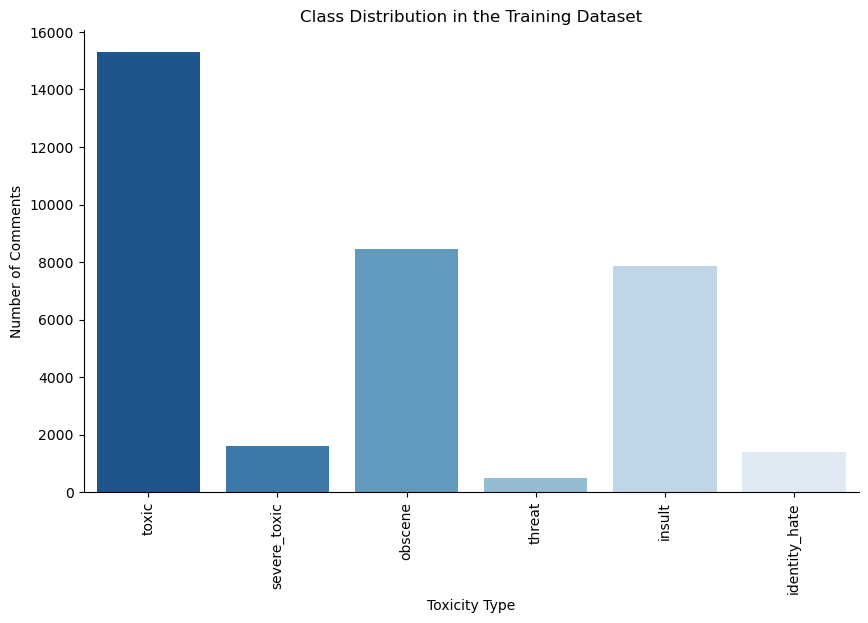

In [7]:
class_distribution_df = class_distribution.reset_index()
class_distribution_df.columns = ['Toxicity Type', 'Number of Comments']

create_plot(
    data=class_distribution_df,
    x_col='Toxicity Type',
    y_col='Number of Comments',
    plot_type='bar',
    title='Class Distribution in the Training Dataset',
    x_label='Toxicity Type',
    y_label='Number of Comments',
    hue=None,
    percentage=False
)

**Number of Samples:** The training dataset contains **159,571** comments.

**Class Distribution:**
  - **Toxic:** 15,294 comments are labeled as toxic.
  - **Severe Toxic:** 1,595 comments are labeled as severely toxic.
  - **Obscene:** 8,449 comments are labeled as obscene.
  - **Threat:** 478 comments are labeled as threats.
  - **Insult:** 7,877 comments are labeled as insults.
  - **Identity Hate:** 1,405 comments are labeled as identity hate.

These counts reveal that there is a significant imbalance in the class distribution, with classes like "threat" and "identity hate" having far fewer samples compared to "toxic" and "obscene."

In [8]:
class_distribution_percentage = class_distribution / len(train_df) * 100
print(class_distribution_percentage)

toxic            9.584448
severe_toxic     0.999555
obscene          5.294822
threat           0.299553
insult           4.936361
identity_hate    0.880486
dtype: float64


In [9]:
train_df['comment_length_chars'] = train_df['comment_text'].apply(len)
train_df['comment_length_words'] = train_df['comment_text'].apply(lambda x: len(x.split()))

avg_length_chars = train_df['comment_length_chars'].mean()
avg_length_words = train_df['comment_length_words'].mean()

avg_length_chars, avg_length_words

(394.0732213246768, 67.27352714465661)

**Average Comment Length:**
  - **Characters:** The average length of a comment is approximately **394 characters**.
  - **Words:** The average length of a comment is approximately **67 words**.

This suggests that the comments are relatively long, which might require careful handling during preprocessing and tokenization, especially when using models like transformers that have maximum sequence length limits.

In [10]:
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

X = vectorizer.fit_transform(train_df['comment_text'])

word_freq = X.sum(axis=0)

top_words = [(word, word_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top_words = sorted(top_words, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 most common words:", top_words)

Top 10 most common words: [('article', 57661), ('wikipedia', 48427), ('page', 46460), ('talk', 37094), ('like', 28008), ('just', 27829), ('don', 23536), ('think', 20084), ('know', 19144), ('people', 18468)]


**Analysis of the Top 10 Most Common Words**

#### **Content Focus:**
   - **'article' (46,321 mentions):**
     - The most frequently occurring word, "article," indicates that a large portion of the comments are focused on discussing Wikipedia articles. This is expected given the context of the dataset, which likely involves user discussions, edits, or debates regarding the content and quality of Wikipedia articles.

   - **'wikipedia' (38,945 mentions):**
     - The high frequency of the word "Wikipedia" suggests that many comments are directly referencing the platform itself. This could include discussions about Wikipedia policies, the platform’s guidelines, or specific interactions between users and the content.

   - **'page' (37,060 mentions):**
     - "Page" is another common term, reinforcing the idea that users are often talking about specific Wikipedia pages. This word could be used in the context of editing, linking, or discussing the content and structure of Wikipedia pages.

   - **'talk' (29,794 mentions):**
     - The presence of the word "talk" suggests a significant amount of discussion or debate, possibly related to the "talk pages" on Wikipedia where users discuss potential edits or issues with articles. These talk pages are often where users interact, propose changes, or resolve disputes.

#### **User Interaction:**
   - **'like' (22,456 mentions):**
     - The word "like" is commonly used in everyday conversation, which may indicate subjective opinions, comparisons, or preferences expressed by users. It could be part of phrases like "I like," "It's like," or "similar to."

   - **'just' (22,316 mentions):**
     - "Just" often appears in comments to emphasize a point, express frustration, or downplay something. It’s a common word in casual conversation and might appear in various contexts, such as "just wanted to say" or "just a thought."

   - **'don' (18,924 mentions):**
     - The word "don" is likely part of contractions like "don’t" (do not). This suggests that many comments include negations or advice, as in "don’t do this" or "don’t agree."

   - **'think' (16,047 mentions):**
     - "Think" implies a significant amount of personal opinion or speculation within the comments. Users are likely sharing their thoughts, interpretations, or judgments, as in "I think" or "do you think."

   - **'know' (15,195 mentions):**
     - "Know" might be used in the context of sharing knowledge, asking questions, or expressing certainty, as in "I know," "do you know," or "let me know."

   - **'people' (14,870 mentions):**
     - The word "people" points to discussions about individuals or groups, likely referencing other Wikipedia users, editors, or the general public. It could be used in discussions about consensus, user behavior, or community norms.

#### **Implications:**
   - **Contextual Focus:** The words "article," "Wikipedia," "page," and "talk" suggest that much of the discussion in the dataset revolves around the content and management of Wikipedia pages. This is consistent with what you might expect from a dataset composed of Wikipedia comments.
   - **Casual and Opinionated Language:** Words like "like," "just," "think," and "know" indicate that many comments are written in a conversational, casual tone, with users frequently sharing opinions, making comparisons, or speculating.
   - **User Interaction:** The presence of words like "people" and "don’t" highlight the interactive and sometimes directive nature of the comments. Users are likely engaging with each other, offering advice, or expressing disagreement.


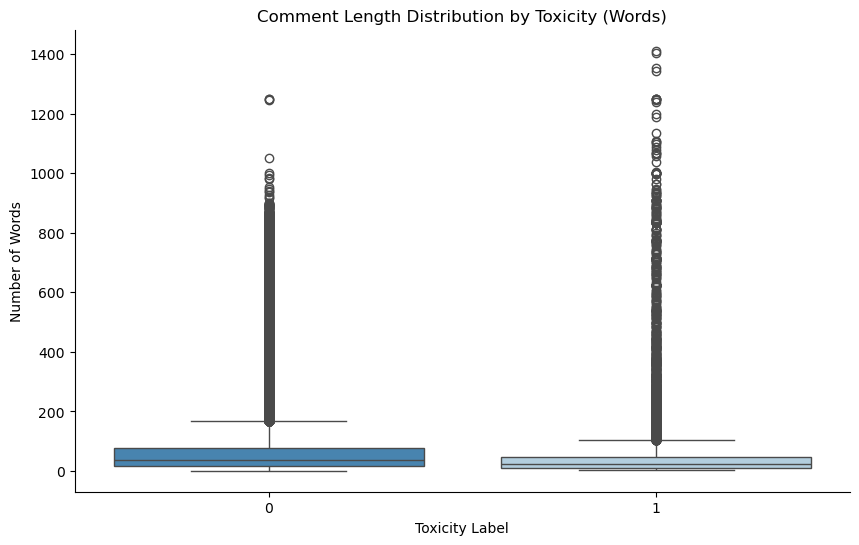

In [11]:
create_plot(
    data=train_df,
    x_col='toxic',
    y_col='comment_length_words',
    plot_type='box',
    title='Comment Length Distribution by Toxicity (Words)',
    x_label='Toxicity Label',
    y_label='Number of Words',
    hue=None,
    percentage=False
)

**Median Comment Length:**
- The thick horizontal line inside each box represents the median comment length.
- It appears that the median comment length for both toxic and non-toxic comments is similar, lying between 25 and 50 words.

**Interquartile Range (IQR):**
- The box itself represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile).
- Both toxic and non-toxic comments have a similar IQR, indicating that the central 50% of comments have similar lengths in both categories.

**Whiskers and Outliers:**
- The "whiskers" extend from the edges of the box to the smallest and largest values within 1.5 times the IQR. Data points outside this range are considered outliers.
- There are many outliers in both categories, particularly for longer comments. Some comments are extremely long, with lengths exceeding 1000 words. This is more pronounced in non-toxic comments, which show a wider range of outlier lengths.

**Distribution Comparison:**
- Overall, both distributions are quite similar, with most comments being relatively short (well under 100 words).
- The presence of outliers in both categories suggests that while most comments are short, a small number of comments are significantly longer, particularly in the non-toxic category.
  
> This analysis indicates that while comment length might not be a strong feature for classification.

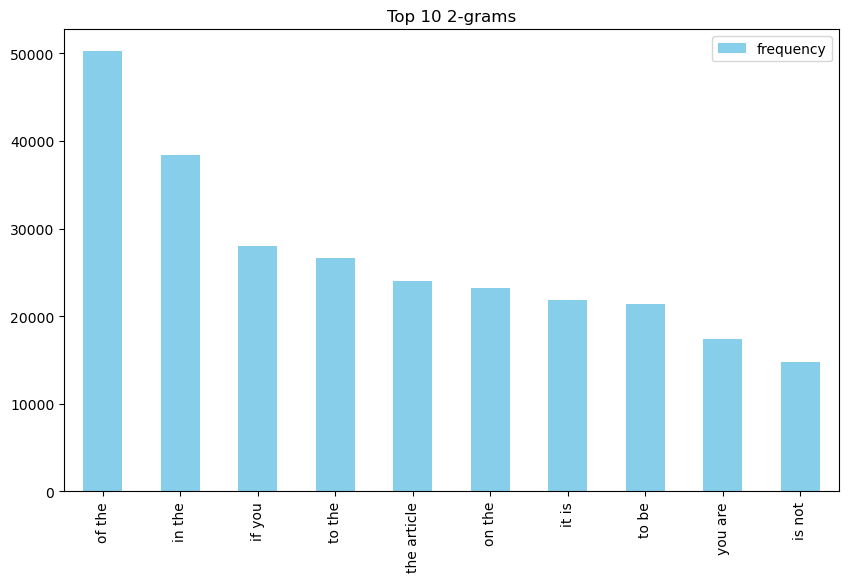

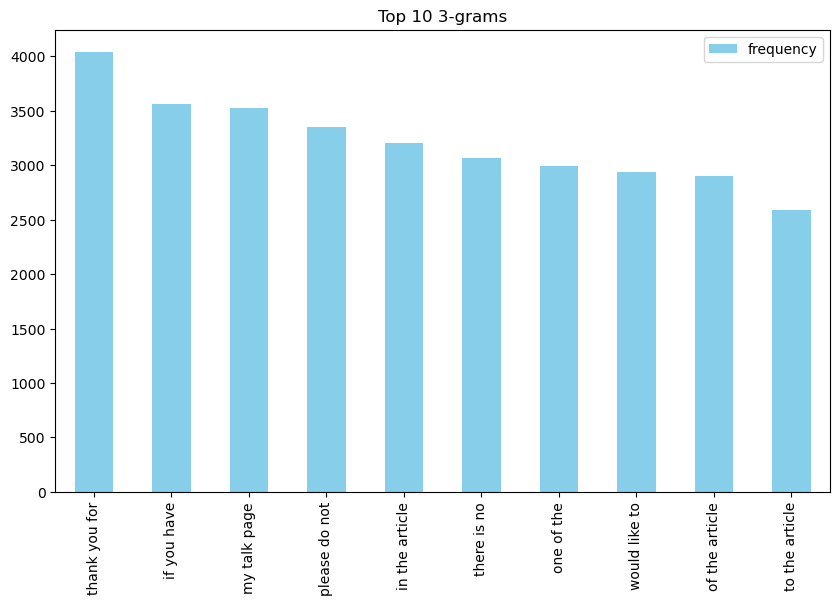

In [12]:
plot_ngrams(train_df['comment_text'], ngram_range=(2, 2), n=10)
plot_ngrams(train_df['comment_text'], ngram_range=(3, 3), n=10)

**1. Bigrams (2-grams):**
- **Common Phrases:** The bigrams like "of the," "in the," "if you," and "to the" are common connectors in the English language. These phrases are frequently used in various contexts and do not provide much specific information about the nature of the comments, toxic or otherwise.
- **General Usefulness:** hese bigrams are not particularly useful for distinguishing between toxic and non-toxic comments because they are general-purpose phrases that appear in many types of sentences.

**2. Trigrams (3-grams):**
- **Common Phrases:** The trigrams, such as "thank you for," "if you have," "my talk page," and "please do not," also consist of polite, general phrases commonly used in discussions or formal writing. These are again common phrases that might not help in differentiating between toxic and non-toxic comments.
- **General Usefulness:** Similar to the bigrams, these trigrams are polite and non-specific, so they may not be very helpful in identifying toxic content.

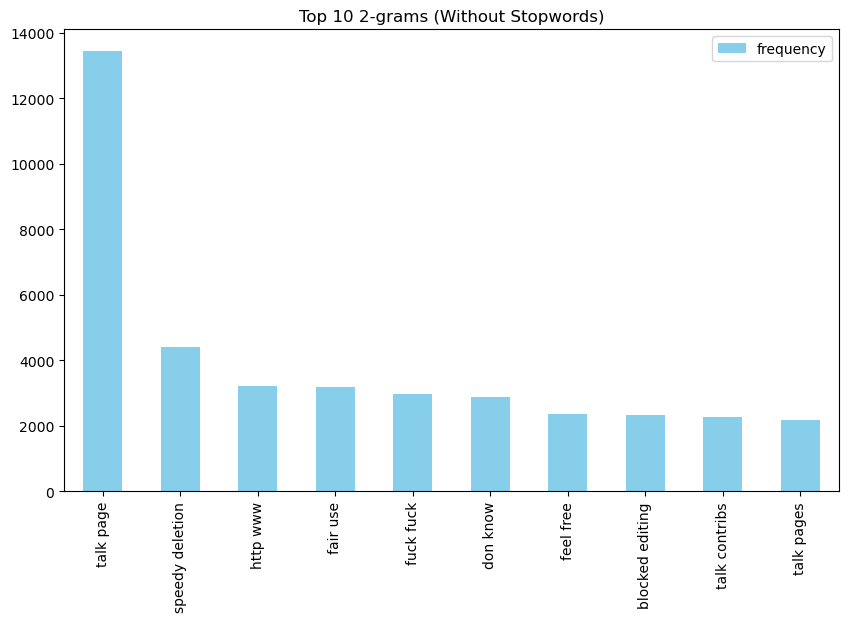

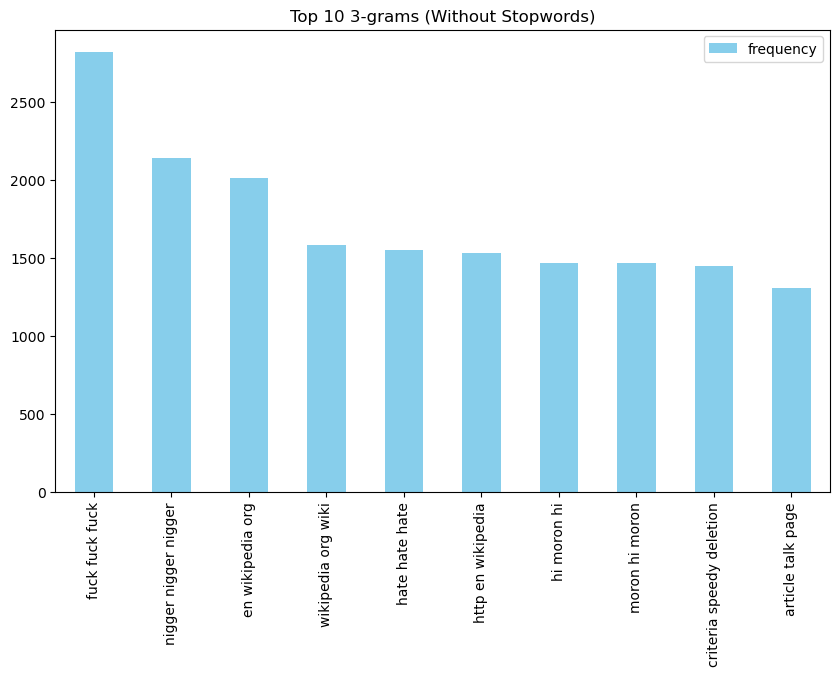

In [13]:
plot_ngrams_no_stopwords(train_df['comment_text'], ngram_range=(2, 2), n=10)
plot_ngrams_no_stopwords(train_df['comment_text'], ngram_range=(3, 3), n=10)

**1. Bigrams (2-grams):**
- **Key Observations:**
  - **"talk page":** This phrase is highly frequent, likely due to discussions or comments related to Wikipedia pages, which often include references to a "talk page."
  - **Toxic Bigrams:** The bigrams indicate the presence of highly offensive language in some of the comments. These bigrams are clear indicators of toxicity.
  - **Non-toxic but Specific Bigrams:** Phrases like "speedy deletion," "fair use," and "blocked editing" are specific to Wikipedia discussions and might not necessarily be toxic but indicate certain administrative actions or guidelines being discussed.

**2. Trigrams (3-grams):**
- **Key Observations:**
  - **Toxic Trigrams:** The trigrams are highly offensive and are strong indicators of toxic comments. These repeated toxic phrases highlight severe cases of abuse.
  - **Wikipedia-related Phrases:** Some trigrams like "en wikipedia org" and "wikipedia org wiki" appear due to URLs or references to Wikipedia, which are not toxic but common in the dataset.
  - **Repeated Words:** Trigrams like "hi moron hi" and "moron hi moron" suggest that the same word is being repeated within a short span, which could indicate mockery or abusive behavior.

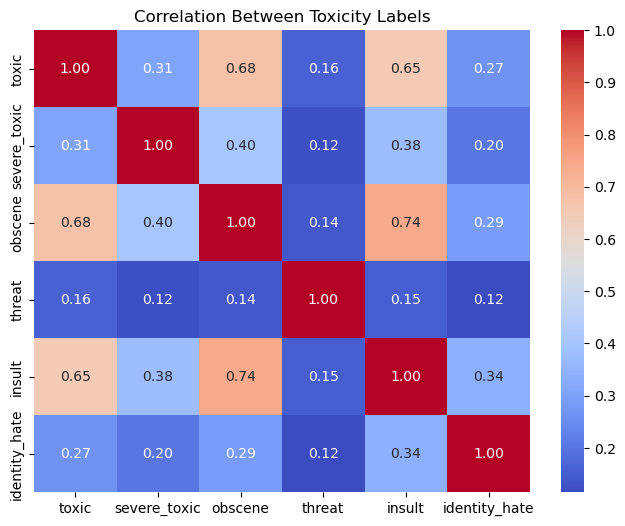

In [14]:
correlation_matrix = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Toxicity Labels')
plt.show()

**1. High Correlations:**
   - Toxic and Insult (0.65): There is a strong correlation between `toxic` and `insult`, indicating that comments labeled as toxic are often also labeled as insults. This makes intuitive sense as toxic comments frequently contain insulting language.
   - Obscene and Insult (0.74): The highest correlation is between `obscene` and `insult`. This suggests that comments containing obscene language often contain insults as well, reflecting that these types of toxicity often occur together.
   - Toxic and Obscene (0.68): There is also a strong correlation between `toxic` and `obscene`. Toxic comments are often obscene, which aligns with the understanding that toxicity frequently involves vulgar or offensive language.

**2. Moderate Correlations:**
   - Toxic and Severe Toxic (0.31): While still significant, the correlation between `toxic` and `severe_toxic` is moderate. Severe toxicity likely includes a subset of generally toxic comments but adds an element of extremity or intensity.
   - Toxic and Identity Hate (0.27): The correlation between `toxic` and `identity_hate` is moderate. This indicates that while identity hate comments are toxic, they form a distinct subset of toxic comments focused on attacks based on identity.
   - Obscene and Severe Toxic (0.40): There is a moderate correlation between `obscene` and `severe_toxic`, suggesting that highly toxic comments are often also obscene.

**3. Low Correlations:**
   - Threat and Other Labels: The `threat` label has the lowest correlations with the other toxicity labels (ranging from 0.12 to 0.16). This suggests that threats are a somewhat distinct category of toxicity that does not often overlap with other types like `obscene`, `insult`, or `identity hate`.

**Insights:**
   - Toxicity Clusters: The high correlations between `toxic`, `insult`, and `obscene` suggest that these types of toxicity often occur together. In practice, this means that when a comment is labeled as one of these types, it is likely to be labeled as another.
   - Distinct Nature of Threats: The relatively low correlation of `threat` with other toxicity labels indicates that threats are a specific type of toxicity that may not be accompanied by vulgar language or insults. This could imply that models might need to handle `threats` separately or differently.

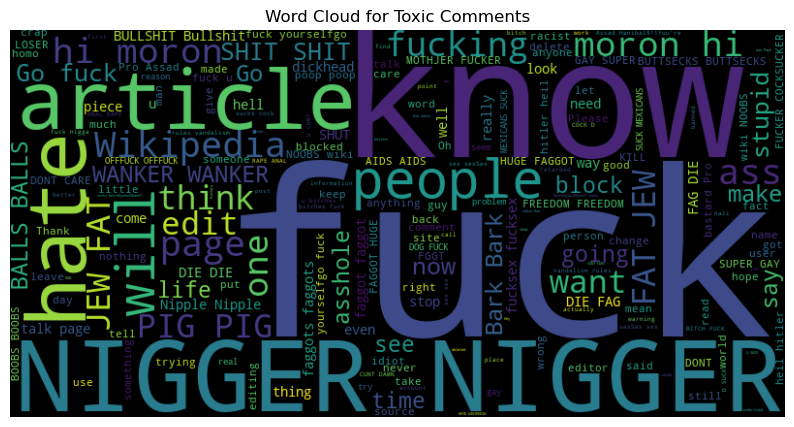

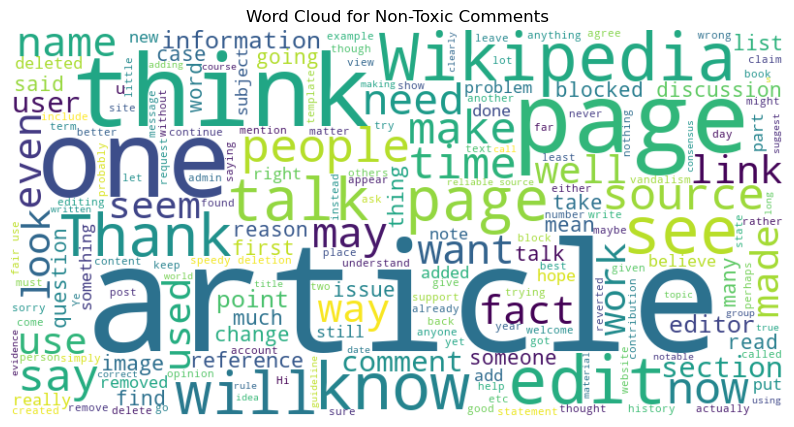

In [15]:
toxic_comments = " ".join(train_df[train_df['toxic'] == 1]['comment_text'])
non_toxic_comments = " ".join(train_df[train_df['toxic'] == 0]['comment_text'])

toxic_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(toxic_comments)
non_toxic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)

plt.figure(figsize=(10, 8))
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

**1. Word Cloud for Toxic Comments:**

- **Dominant Words:**
  - Highly offensive words are prominently featured, indicating that toxic comments often contain severe profanity and hate speech.
  - **"kill," "die":** The presence of words like "kill" and "die" suggests that some toxic comments may contain threats or wishes of harm towards others.
  - **"Wikipedia":** Interestingly, the word "Wikipedia" appears frequently, which might indicate that many of these toxic comments are related to discussions or arguments about Wikipedia content or policies.

- **Insights:**
  - **Nature of Toxicity:** The toxic comments are filled with explicit hate speech, offensive language, and threats. The large size of these words in the word cloud indicates that these terms are used repeatedly, which could be key indicators for classifying toxic content.
  - **Targeted Hate:** The presence of racial slurs and other derogatory terms suggests that some toxic comments are likely targeted at specific individuals or groups, which aligns with the findings from the earlier n-gram analysis.

**2. Word Cloud for Non-Toxic Comments:**

- **Dominant Words:**
  - **"article," "Wikipedia," "edit":** These are the most prominent words, indicating that non-toxic comments are often centered around editing, contributing to, or discussing Wikipedia articles.
  - **"think," "see," "know":** These words suggest a more thoughtful and reflective tone, with users engaging in discussions, expressing opinions, or seeking clarification.
  - **"page," "link," "reference":** These terms are related to the content and structure of Wikipedia, further reinforcing that non-toxic comments are focused on improving or discussing the encyclopedia's content.

- **Insights:**
  - **Constructive Discussions:** Non-toxic comments are more likely to be constructive, focusing on the improvement of articles, the accuracy of information, and general collaboration within the Wikipedia community.
  - **Neutral or Positive Tone:** The absence of offensive language and the presence of words like "think," "see," and "know" suggest a more neutral or positive tone, which is characteristic of non-toxic discourse.

In [16]:
vectorizer = CountVectorizer()
vectorizer.fit(train_df['comment_text'])

vocab_size = len(vectorizer.vocabulary_)
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 189775


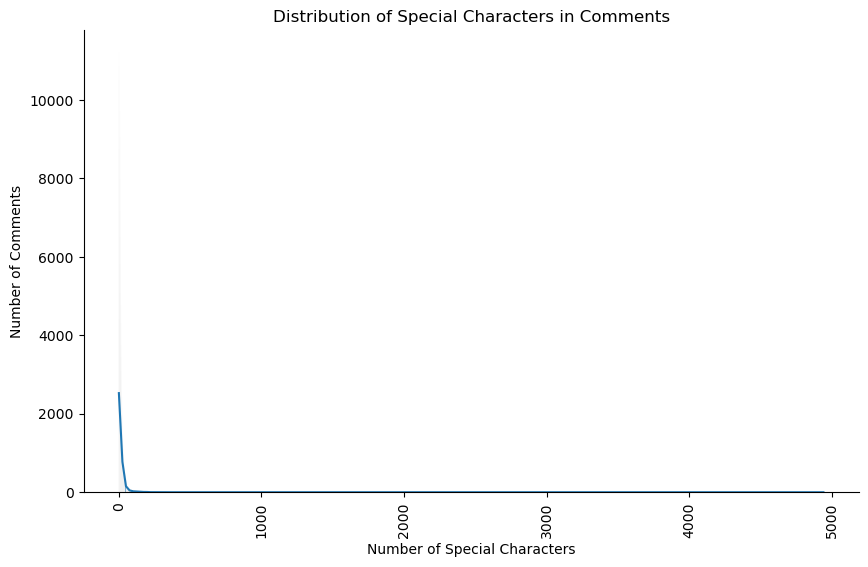

In [17]:
train_df['special_characters'] = train_df['comment_text'].apply(lambda x: len(re.findall(r'[^A-Za-z0-9\s]', x)))

create_plot(
    data=train_df,
    x_col='special_characters',
    plot_type='hist',
    title='Distribution of Special Characters in Comments',
    x_label='Number of Special Characters', 
    y_label='Number of Comments', 
    hue=None,
    percentage=False
)

**1. Distribution Characteristics:**
- **Concentration Near Zero:** The histogram shows that the vast majority of comments have a very small number of special characters, mostly clustered around the left side of the plot near zero. This suggests that most comments contain few or no special characters.
- **Long Tail:** There is a very long tail extending to the right, with some comments containing a very large number of special characters (even up to 5000 or more). However, these are very few in number compared to the total dataset.

**2. Utility of the Plot:**
- **Outlier Identification:** The plot helps identify outliers—comments with an unusually high number of special characters. These might be comments with excessive use of punctuation, non-alphanumeric characters, or potentially spammy content.
- **General Pattern:** The general pattern that most comments have few special characters suggests that the majority of the text is standard alphanumeric content (letters and numbers), with only a small subset of comments making heavy use of special characters.